

# Ungraded Lab:  Logistic Regression using Scikit-Learn




## Goals
In this lab you will:
-  Train a logistic regression model using scikit-learn.


## Dataset
Let's start with the same dataset as before.

In [12]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5], [3, 0.6], [0.4, 1.4], [2.9, 1], [0.9, 1.1]])
y = np.array([0, 0, 0, 1, 1, 1, 1, 0, 1,0])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [14]:
X_train, X_test, y_train, y_test

(array([[1. , 2.5],
        [3. , 0.6],
        [2. , 2. ],
        [1.5, 0.5],
        [1. , 1. ],
        [0.4, 1.4],
        [0.5, 1.5],
        [2.9, 1. ]]),
 array([[0.9, 1.1],
        [3. , 0.5]]),
 array([1, 1, 1, 0, 0, 0, 0, 1]),
 array([0, 1]))

## Fit the model

The code below imports the [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) from scikit-learn. You can fit this model on the training data by calling `fit` function.

In [3]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr_model= LogisticRegression()

In [15]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [11]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

## Make Predictions

You can see the predictions made by this model by calling the `predict` function.

In [16]:
y_pred = lr_model.predict(X_test)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 1]


In [20]:
lr_model.score(X_test, y_test)

1.0

In [17]:
y_test

array([0, 1])

In [33]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1, 0],
       [0, 1]])

[0 1]


Text(0.5, 427.9555555555555, 'Predicted label')

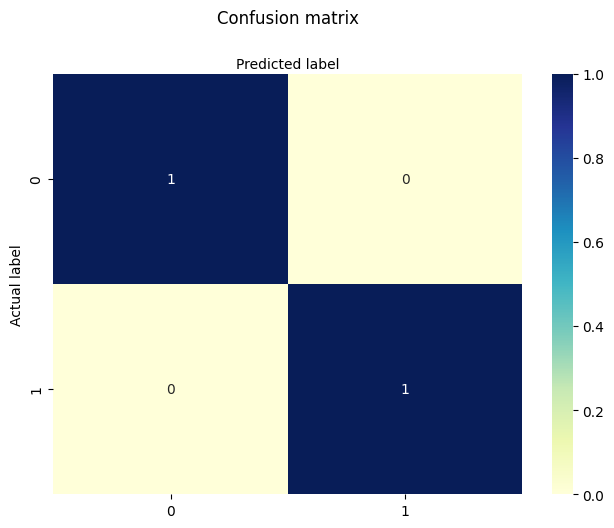

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[2,4] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
print(tick_marks)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')


ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [32]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1, 0],
       [0, 1]])

In [23]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       1.00      1.00      1.00         1
   with diabetes       1.00      1.00      1.00         1

        accuracy                           1.00         2
       macro avg       1.00      1.00      1.00         2
    weighted avg       1.00      1.00      1.00         2



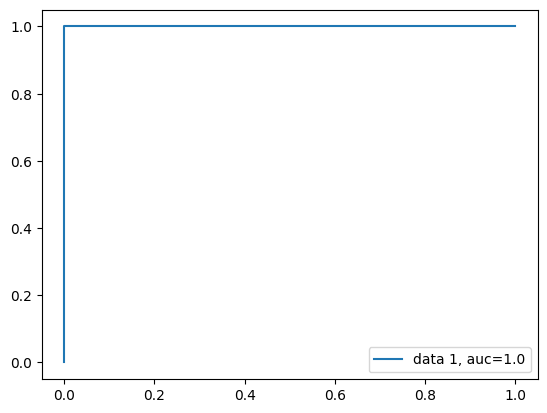

In [29]:
y_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Calculate accuracy

You can calculate this accuracy of this model by calling the `score` function.

In [ ]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0
